## 머신러닝

: 데이터 안에서 규칙을 발견하고 그 규칙을 새로운 데이터에 적용해서 새로운 결과를 도출
- 기존 데이터를 이용해 미래의 미지의 일을 예측
- 학습: 데이터가 입력되고 패턴이 분석되는 과정


## 딥러닝(심층학습, 강화학습)

: 여러 층을 가진 인공신경망을 이용하여 머신러능을 수행하는 것
- 인공신경망을 넓고 다층으로 쌓으면 딥러닝
- 신경망을 사용해 수많은 데이터 속에서 어떤 패턴을 파악하고 이것을 통해 인간이 사물을 구분하듯이 컴퓨터가 데이터를 나누는 것(데이터를 넣으면 알아서 학습 처리)

 
**** 딥러닝 단계에서 군집화된 데이터를 분류 -> 머신러닝 단계를 거쳐 학습 -> 인공지능 단계에서 판단이나 결과를 내는 과정 ****

### 딥러닝 라이브러리 Keras

- 머신러닝 라이브러리 Theano와 TensorFlow를 래핑한 라이브러리
- Keras로 머신러닝을 수행할 때 numpy 배열로 데이터 전달 해야함
- Sequential()삼수를 선언하고 model.add()함수를 사용해 한 층 한 층 쉽게 쌓아 올릴수 있다.
- Dense(activation=,loss=,optimizer=) 각 층이 어떤 특성을 가질지 옵션을 선택
    * activation: 다음 층으로 어떻게 값을 넘길지 결정(relu,sigmoid함수)
    * loss: 한번 신경망이 실행될 때마다 오차 값을 추적하는 함수
    * optimizer: 오차를 어떻게 줄여 나갈지 정하는 함수
- model.eveluate()- 딥러닝의 모델이 어느정도 정확하게 예측하는지 점검


### TensorFlow

- 구글이 공개한 대규모 숫자 계산을 해주는 머신러닝 및 딥러닝 전문 라이브러리
- Tensor는 다차원 행렬 계산을 의미
- C++로 만들어진 라이브러리

In [11]:
#############keras를 이용한  BMI  신경망 학습 ###################

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np
 
csv = pd.read_csv("C:/Users/castl/Desktop/2020_job_academy/machine_learning/수업 내용 정리/딥러닝/dataset/bmi.csv")
# 몸무게와 키 데이터 정규화
csv["weight"] /= 100
csv["height"] /= 200
X = csv[["weight", "height"]].values
 
# 레이블
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000,3))
for i, v in enumerate(csv["label"]):
    y[i] = bclass[v]
	
# 훈련  데이터와 테스트  데이터로 분리  
X_train, y_train = X[1:15001], y[1:15001]
X_test,  y_test  = X[15001:20001], y[15001:20001] 

# 모델 구조 정의   
model = Sequential()
model.add(Dense(512, input_shape=(2,)))
model.add(Activation('relu')) 

model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Activation('softmax'))

# 모델 구축 
model.compile(  loss='categorical_crossentropy',    optimizer="rmsprop",     metrics=['accuracy'])
# 데이터 훈련
hist = model.fit(
    X_train, y_train,
    batch_size=100,
    nb_epoch=20,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2)],
    verbose=1)
	
# 테스트 데이터로 평가  
score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 13500 samples, validate on 1500 samples
Epoch 1/20
13500/13500 [==============================] - 2s 113us/step - loss: nan - accuracy: 0.3276 - val_loss: nan - val_accuracy: 0.3273
Epoch 2/20
 1400/13500 [==>...........................] - ETA: 1s - loss: nan - accuracy: 0.330

C:\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:820: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


4999/4999 [==============================] - 0s 94us/step
loss= nan
accuracy= 0.31886377930641174


## 딥러닝 동작원리

### 선형 회기(linear regression)

: 선형 회기는 정확한 직선을 그려내는 과정으로 직선의 기울기 a값과 y절편 b값을 정확히 예측해 내야 하는것(y=ax+b)

    - 단순 선형 회귀: 하나의 x값만으로 y값을 설명
    - 다중 선형 회귀: 여러개의 x값이 y값을 설명
    
 #### 최소 제곱법(method of least squares)
 
 : 회귀 분석에서 사용 되는 표준 방식
 - 일차 함수의 기울기 a와 y 절편 b를 구할 수 있음
 - x의 편차(각 값과 평균의 차이)를 제곱해서 합한 값을 분모로 놓고 x,y의 편차를 곱해서 합한 값을 분자로 놓으면 기울기a
 - y절편인 b를 구하는 공식: b=mean(y)-(mean(x) * a)

In [12]:
## 최소제곱법을 이용한 공부시간과 성적의 선형회귀 기울기, 절편 구하기 실습##
x=[2,4,6,8]
y=[81,93,91,97]

mx = np.mean(x)
my = np.mean(y)

#최소제곱법의 기울기 공식 
divisor = sum([(mx-i)**2 for i in x])

 

dividend = sum([(x[i]-mx)*(y[i]-my) for i in range(len(x))])
print(divisor)
print(dividend)

#기울기 
a = dividend/divisor
#절편
b = my - (mx*a)

print("기울기 :", a)
print("절편 : ", b)


20.0
46.0
기울기 : 2.3
절편 :  79.0


#### 평균 제곱근 오차(root mean square error)

: 가설을 세운 뒤 이 값이 주어진 요건을 충족하는지 판단하여 조금씩 변화를 주고, 변화가 긍정적이면 오차가 최소가 될 때까지 과정을 반복

- 기울기가 잘못되었을 수록 직선과의 거리의 합(오차의 합) 증가
- 기울기가 무한대로 커지면 오차도 무한대로 커짐

In [13]:
#######선형회귀의 평균 제곱 오차  구하기 #############################
#최소제곱법으로 기울기와 절편을 구할수 없는 경우 임의의 절편과 기울기에서 예측된 값과 
#실제값의 오차를 구해서 오차를 줄이는 방향으로 기울기,절편을 수정하기 위해
#오차 계산 
##########################################################
#임의의 기울기와 절편
a_b = [3, 76]
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x=[i[0] for i in data]
y=[i[1] for i in data]

#예측값
predict = [ a_b[0]*i+a_b[1]  for i in x]

#평균 제곱 오차
mse = np.mean([(predict[i] - y[i])**2 for i in range(len(x))])

print("평균 제곱 오차 :" , mse)

평균 제곱 오차 : 11.0


#### 오차수정-경사하강법(gradient decent)

:미분 기울기를 이용하여 이차 함수 그래프에서 오차를 비교해서 가장 작은 방향으로 이동시키는 방법

- 학습률 : 발산 하지 않도록(학습률이 너무 크면) 학습률의 값을 적절히 바꾸면서 최적의 학습률을 찾는다.

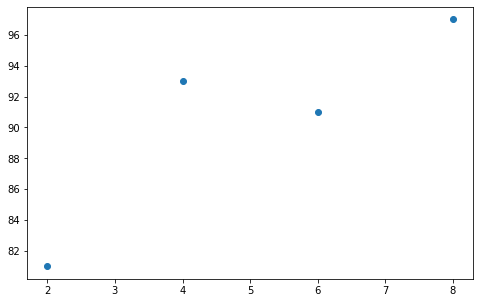

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


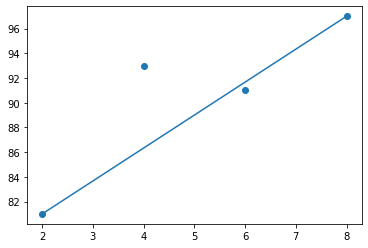

In [15]:
#경사하강법 실습

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.show()

X_data = np.array(x)
y_data = np.array(y)

a=0 #기울기 a를 0으로 초기화
b=0 #절편 b를 0으로 초기화

lr = 0.03        #학습률 
epochs = 2001

 
for i in range(epochs):
    y_pred = a * X_data + b  #이차함수의 한 점에서의 순간 기울기
    error = y_data - y_pred    #오차
    #오차 함수를 a로 미분
    a_diff = -(2/len(X_data)) * sum(X_data *(error))
    #오차 함수를 b로 미분
    b_diff = -(2/len(X_data)) * sum(error)
    #학습률을 곱해서 a값 업데이트
    a= a-lr*a_diff 
    #학습률을 곱해서 b값 업데이트
    b= b-lr*b_diff   
 
    if i%100==0: 
         print('epoch=%.f, 기울기=%.04f, 절편=%.04f' % (i, a, b))

y_pred = a * X_data + b
 
plt.scatter(x, y)
plt.plot([min(X_data), max(X_data)], [min(y_data), max(y_data)])
plt.show()	

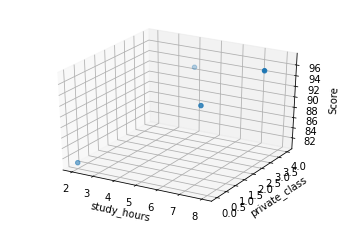

In [16]:
# 경사 하강법으로 다중 선형 회귀 구현 코드

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

 
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

 
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11 
ax.scatter(x1, x2, y)
plt.show()


In [17]:
#x와 y값을 넘파이 배열로 변환
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)
# 기울기 a와 절편 b의 값을 초기화  
a1 = 0
a2 = 0
b = 0
#학습률 
lr = 0.03 
#수행 횟수
epochs = 2001 
#경사 하강법 수행
for i in range(epochs):  
    y_pred = a1 * x1_data + a2 * x2_data + b   
    error = y_data - y_pred  #오차 
    a1_diff = -(1/len(x1_data)) * sum(x1_data * (error)) # 오차함수를 a1로 미분한 값  
    a2_diff = -(1/len(x2_data)) * sum(x2_data * (error)) # 오차함수를 a2로 미분한 값  
    b_new = -(1/len(x1_data)) * sum(y_data - y_pred)  # 오차함수를 b로 미분한 값  
    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1값을 업데이트 
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2값을 업데이트 
    b = b - lr * b_new  # 학습률을 곱해 기존의 b값을 업데이트 
    if i % 100 == 0:    # 100번 반복될 때마다 현재의 a1, a2, b값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))


epoch=0, 기울기1=13.9200, 기울기2=6.3375, 절편=2.7150
epoch=100, 기울기1=8.3148, 기울기2=4.6327, 절편=31.0827
epoch=200, 기울기1=5.7281, 기울기2=3.7455, 절편=48.8273
epoch=300, 기울기1=4.1241, 기울기2=3.1917, 절편=59.8402
epoch=400, 기울기1=3.1286, 기울기2=2.8480, 절편=66.6752
epoch=500, 기울기1=2.5108, 기울기2=2.6347, 절편=70.9172
epoch=600, 기울기1=2.1273, 기울기2=2.5023, 절편=73.5500
epoch=700, 기울기1=1.8893, 기울기2=2.4201, 절편=75.1840
epoch=800, 기울기1=1.7416, 기울기2=2.3691, 절편=76.1981
epoch=900, 기울기1=1.6500, 기울기2=2.3375, 절편=76.8275
epoch=1000, 기울기1=1.5931, 기울기2=2.3179, 절편=77.2181
epoch=1100, 기울기1=1.5578, 기울기2=2.3057, 절편=77.4605
epoch=1200, 기울기1=1.5359, 기울기2=2.2981, 절편=77.6110
epoch=1300, 기울기1=1.5223, 기울기2=2.2934, 절편=77.7044
epoch=1400, 기울기1=1.5138, 기울기2=2.2905, 절편=77.7623
epoch=1500, 기울기1=1.5086, 기울기2=2.2887, 절편=77.7983
epoch=1600, 기울기1=1.5053, 기울기2=2.2876, 절편=77.8206
epoch=1700, 기울기1=1.5033, 기울기2=2.2869, 절편=77.8345
epoch=1800, 기울기1=1.5020, 기울기2=2.2864, 절편=77.8431
epoch=1900, 기울기1=1.5013, 기울기2=2.2862, 절편=77.8484
epoch=2000, 기울기1=1.5008, 기울기2=2.

### 로지스틱 회귀

: 선형 회귀와 마찬가지로 선을 그려나가지만 참(1)과 거짓(0)사이를 구분하는 s자형태로 선을 그음

#### 시그모이드 함수

- s자 형태로 그래프가 그려지는 함수
- a는 그래프의 경사도를 결정, 커지면 경사가 커지고, 작아지면 경사가 작아짐
    * a값이 작아질수록 오차는 무한대로 커지지만 a값이 커진다고 오차가 무한대로 커지지 않음
- b는 좌우 이동 함, 작으면 좌로 이동, 크면 우로 이동
    * b값이 너무 작아지거나 커지면 오차도 무한대로 커짐
- y값이 0과 1사이
- y의 실제 값이 1일 때 -log h 그래프를 쓰고, 0일 때 -log(1 -h) 그래프 사용
- y의 실제 값이 1일 때 b가 없어지고, 0일 때  a부분이 없어짐

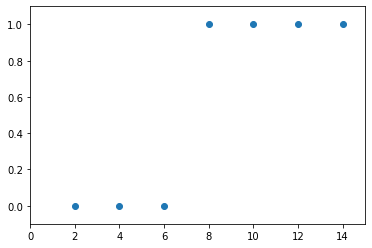

epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=2000, 기울기=1.9065, 절편=-12.9489
epoch=2000, 기울기=1.9055, 절편=-12.9491
epoch=2000, 기울기=1.8515, 절편=-12.9581
epoch=2000, 기울기=1.9057, 절편=-12.9514
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513


In [18]:
#시그모이드 함수
data =[[2, 0], [4, 0],[6, 0],[8, 1],[10, 1],[12, 1], [14, 1]]
x=[i[0] for i in data]
y=[i[1] for i in data]



plt.scatter(x, y)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
plt.show()

#a, b 초기화 
a = 0
b = 0

#학습률 
lr = 0.05 

#시그모이드 함수 정의  1/(1+np.e ** (-x)) 
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

#경사 하강법  실행 
for i in range(2001):
    for x_data, y_data in data:
        a_diff = x_data*(sigmoid(a*x_data + b) - y_data) 
        b_diff = sigmoid(a*x_data + b) - y_data
        a = a - lr * a_diff
        b = b - lr * b_diff
        if i % 1000 == 0:     
            print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))


#### 퍼셉트론

: 입력 값과 활성화 함수를 사용해 출력 값을 다음으로 넘기는 가장 작은 신경망 단위

- N개의 이진수가 하나의 뉴런을 통과해서 가중합 0보다 크면 활성화되는 가장 간단한 신경망 구조
- 초평면으로 구분되는 두개의 공간을 분리시키는 역할
- AND, OR 게이트 생성 가능
- 가중합: 입력 값(x)와 가중치(w)의 곱을 모두 더한 값에 바이어스(b)를 더한 값
- 활성화 함수: 0과 1을 판단하는 함수
    y=wx+b
    
- XOR문제를 해결하기 위해 두개의 퍼셉트론(다중 퍼셉트론)을 계산할 수 있어야함

In [19]:
#XOR 문제 코드 구현

w11 = np.array([-2,-2])
w12 = np.array([2,2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

def MLP(x, w, b):
    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1

def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

               
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print("입력값 : "+ str(x) +" 출력값: "+ str(y))

입력값 : (0, 0) 출력값: 0
입력값 : (1, 0) 출력값: 1
입력값 : (0, 1) 출력값: 1
입력값 : (1, 1) 출력값: 0


#### 다중 퍼셉트론

: 은닉층으로 퍼셉트론이 각각 자신의 가중치(w)와 바이어스(b)값을 보내고 은닉층에 모인 값이 한 번 더 시그모이드 함수를 이용해 최종 값으로 결과를 보냄
- 출력층에서 시그모이드 함수를 통해 y값이 정해짐

#### 오차 역전파

: 신경망 내부의 가중치를 수정하는 방법으로 임의의 가중치를 선언하고 최소 제곱법을 이용해 오차를 구한 뒤 이 오차가 최소인 지점(기울기=0)으로 계속해서 조금 씩 이동시킴

- 다층 퍼셉트론에서의 최적화 과정


In [23]:
#폐암 수술 환자의 생존율 

np.random.seed(0)
tf.random.set_seed(0)

data = np.loadtxt("C:/Users/castl/Desktop/2020_job_academy/machine_learning/수업 내용 정리/딥러닝/dataset/ThoraricSurgery.csv", delimiter=",")

X = data[:, 0:17]
Y = data[:, 17]

model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=100, batch_size=10)

Epoch 1/100
470/470 [==============================] - 0s 140us/step - loss: 0.4350 - accuracy: 0.5532
Epoch 2/100
470/470 [==============================] - 0s 66us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 3/100
470/470 [==============================] - 0s 64us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 4/100
470/470 [==============================] - 0s 62us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 5/100
470/470 [==============================] - 0s 64us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 6/100
470/470 [==============================] - 0s 66us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 7/100
470/470 [==============================] - 0s 64us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 8/100
470/470 [==============================] - 0s 64us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 9/100
470/470 [==============================] - 0s 64us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 10/100
470/470 [==============================] - 0s 66us/step - loss: 0.14

470/470 [==============================] - 0s 85us/step - loss: 0.1450 - accuracy: 0.8511
Epoch 81/100
470/470 [==============================] - 0s 81us/step - loss: 0.1449 - accuracy: 0.8532
Epoch 82/100
470/470 [==============================] - 0s 64us/step - loss: 0.1447 - accuracy: 0.8511
Epoch 83/100
470/470 [==============================] - 0s 60us/step - loss: 0.1447 - accuracy: 0.8553
Epoch 84/100
470/470 [==============================] - 0s 68us/step - loss: 0.1452 - accuracy: 0.8511
Epoch 85/100
470/470 [==============================] - 0s 62us/step - loss: 0.1445 - accuracy: 0.8574
Epoch 86/100
470/470 [==============================] - 0s 62us/step - loss: 0.1445 - accuracy: 0.8511
Epoch 87/100
470/470 [==============================] - 0s 63us/step - loss: 0.1441 - accuracy: 0.8553
Epoch 88/100
470/470 [==============================] - 0s 62us/step - loss: 0.1437 - accuracy: 0.8511
Epoch 89/100
470/470 [==============================] - 0s 87us/step - loss: 0.1437 - 